### PRAVEEN K NAIR, Data Science and Business Analytics Intern at The Spark Foundation
# Task 2 - Prediction using Unsupervised ML
### Problem - Predict optimum number of clusters and represent it visually.

#### Importing Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

#### Load dataset

In [2]:
# Loading and Viewing first 5 rows of the dataset
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Data Analysis

In [3]:
# No of rows and columns (dimension of dataset)
df.shape

(150, 5)

In [4]:
# Checking datatypes in the data
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
# Checking if there any null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### Clustering Using Elbow Method

In [6]:
# Allocating numerical variables to X
X = df.iloc[:,[0,1,2,3]].values

In [7]:
# Sum of squared distances
sse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

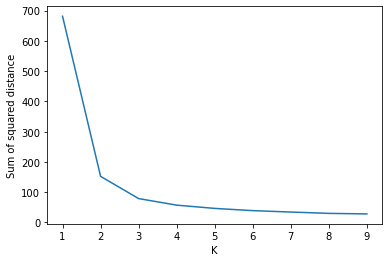

In [14]:
# Visualizing elbow plot
plt.xlabel('K')
plt.ylabel('Sum of squared distance')
plt.plot(k_range,sse)

##### From the above elbow plot the optimum number of clusters is 3

#### Fitting the model

In [9]:
# Fitting and predicting different clusters
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(X)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [10]:
df['cluster'] = y_predicted

In [11]:
# Cluster centroids
Y=km.cluster_centers_
Y

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

#### Visualizing Clusters

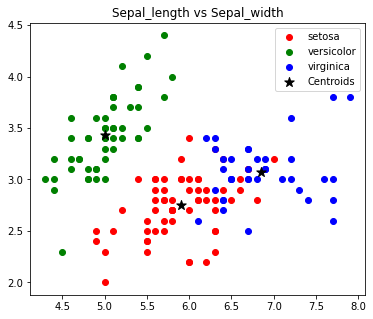

In [12]:
# Plotting Sepal_length vs Sepal_width scatter plot after clustering
plt.figure(figsize=(6,5))
plt.scatter(X[df.cluster==0,0],X[df.cluster==0,1],color='r',label="setosa")
plt.scatter(X[df.cluster==1,0],X[df.cluster==1,1],color='g',label="versicolor")
plt.scatter(X[df.cluster==2,0],X[df.cluster==2,1],color='b',label="virginica")
plt.scatter(Y[:,0],Y[:,1],marker='*',color='black',s=100,label="Centroids")
plt.title("Sepal_length vs Sepal_width")
plt.legend()

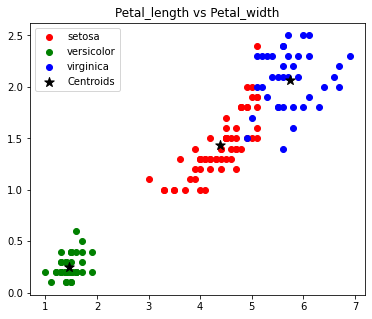

In [13]:
# Plotting Petal_length vs Petal_width scatter plot after clustering
plt.figure(figsize=(6,5))
plt.scatter(X[df.cluster==0,2],X[df.cluster==0,3],color='r',label="setosa")
plt.scatter(X[df.cluster==1,2],X[df.cluster==1,3],color='g',label="versicolor")
plt.scatter(X[df.cluster==2,2],X[df.cluster==2,3],color='b',label="virginica")
plt.scatter(Y[:,2],Y[:,3],marker='*',color='black',s=100,label="Centroids")
plt.title("Petal_length vs Petal_width")
plt.legend()

##### From the elbow plot and above visualizations it is confirmed that optimum number of cluster present in the iris dataset is 3